In [1]:
import pandas as pd
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
data = pd.read_csv('iris.data', sep=',', names=['sep_len', 'sep_wid', 'pet_len', 'pet_wid', 'label'])
Y = data.label
X = data.drop('label', axis=1)

# Classification

In [3]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=.2, stratify=Y)

In [4]:
print(len(X_train), len(X_test))

120 30


In [5]:
clf = GaussianNB()
model = clf.fit(X_train, Y_train)

In [6]:
predictions = model.predict(X_test)

In [7]:
print(classification_report(Y_test, predictions))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       0.90      0.90      0.90        10
 Iris-virginica       0.90      0.90      0.90        10

       accuracy                           0.93        30
      macro avg       0.93      0.93      0.93        30
   weighted avg       0.93      0.93      0.93        30



In [8]:
print(confusion_matrix(Y_test, predictions))

[[10  0  0]
 [ 0  9  1]
 [ 0  1  9]]


# Clustering

In [9]:
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans

In [10]:
kmeans = KMeans(n_clusters=3, random_state=0).fit(X)

In [11]:
kmeans.cluster_centers_

array([[6.85      , 3.07368421, 5.74210526, 2.07105263],
       [5.006     , 3.418     , 1.464     , 0.244     ],
       [5.9016129 , 2.7483871 , 4.39354839, 1.43387097]])

In [12]:
X2 = data.drop('sep_len', axis=1).drop('sep_wid', axis=1).drop('label', axis=1)

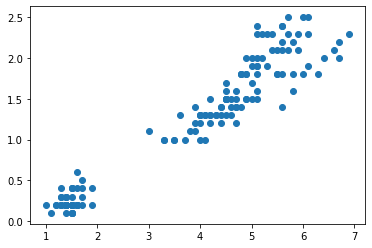

In [13]:
plt.scatter(X2['pet_len'], X2['pet_wid'])

In [14]:
kmeans = KMeans(n_clusters=3, random_state=0, max_iter= 300).fit(X2)
Cx = [x[0] for x in kmeans.cluster_centers_]
Cy = [x[1] for x in kmeans.cluster_centers_]

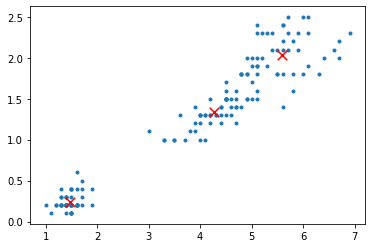

In [15]:
plt.scatter(X2['pet_len'], X2['pet_wid'], marker='.')
plt.scatter(Cx, Cy, color='red', marker='x', s=90)
plt.show()